In [1]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.geochemistry.PEC as pec
import pandas as pd
import elements as e
import matplotlib.pyplot as plt
import meltInc.plotting as p

p.layout()
config = mp.configuration()
config.melt_thermometer = "putirka2008_16"
config.print()

Kd Fe-Mg ol-melt.......................toplis
Melt Fe3+/Fe2+........................borisov
Melt thermometer...............putirka2008_16
Volatile solubility model......IaconoMarziano


In [2]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')
olivine = mp.read_olivine('./olivine.csv', index_col=['name'], total_col="total")

In [3]:
idx = 6
forsterites = olivine.forsterite
inclusion = melt.iloc[idx, :].copy()
ol_host = olivine.iloc[idx, :].copy()
Fo = 0.9
FeO_initial = 11.2
P_bar = 2e3
Fo

0.9

In [4]:
w, t, kd, oc = pec.Fe_equilibrate(inclusion, Fo, P_bar)

In [5]:
kd, oc

((0.2719287107742716, 0.2720205441666485), -0.041750000000000016)

In [6]:
inclusion_2 = w.iloc[-1]

In [7]:
inclusion_2

SiO2      45.373889
Al2O3     18.470178
MgO        7.758383
CaO       10.216885
FeO        7.232251
Na2O       4.125613
K2O        1.450992
MnO        0.186025
TiO2       3.297803
P2O5       1.031403
Cr2O3      0.000000
CO2        0.214755
H2O        0.376116
F          0.092806
S          0.103967
Cl         0.068932
total    100.000000
Name: -0.014000000000000004, dtype: float64

In [8]:
w2, om, kd2, t = pec.crystallisation_correction(inclusion_2, Fo, FeO_initial, P_bar)

Float64Index([0.0, 0.05, 0.1, 0.15, 0.2, 0.25], dtype='float64')
Float64Index([0.0, 0.05, 0.1, 0.15, 0.2, 0.21, 0.22], dtype='float64')


In [14]:
t

(1515.5473620554594, 1456.242112211864)

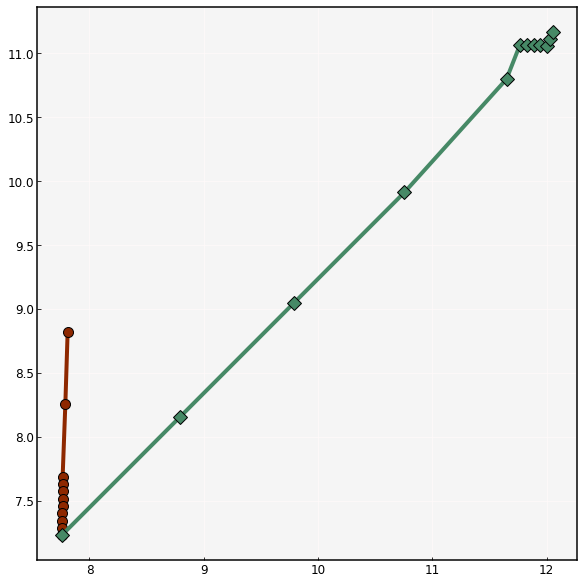

In [11]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(w["MgO"], w["FeO"], "-o")
ax.plot(w2["MgO"], w2["FeO"], "-D")